In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn
import matplotlib as zh
import matplotlib.pyplot as plt 
zhfont1 = zh.font_manager.FontProperties(fname='c:\Windows\Fonts\simkai.ttf',size=15)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
da = pd.read_csv(r'D:\学习\大创\文浩-基于机器学习的燃煤电站SCR脱硝效率预测研究\回归森林\TNdata.csv',encoding='gb2312')
x1=da['fuhe']
x2=da['1guolugonganmuguanyali']
x3=da['1guoluAxisifengjidianliu']
x4=da['1guoluAchexishifengliuliang']
x5=da['1guoluBxisifengjidianliu']
x6=da['1guoluBchexishifengliuliang']
x7=da['1guoluAchepenganliuliang']
x8=da['1guoluBchepenganliuliang']
x9=da['1guoluAcheSCRchukouyanwen']
x10=da['1guoluBcheSCRchukouyanwen']
x11=da['1guoluAcherukouyanwen']
x12=da['1guoluBcheSCRrukouyanwen']
x13=da['1guoluAcheSCRjinkouyanqiyali']
x14=da['1guoluAcheSCRchukouyanqiyali']
x15=da['1guoluAcheSCRyacha']
x16=da['1guoluBcheSCRjinkouyali']
x17=da['1guoluBcheSCRchukouyali']
x18=da['1guoluBcheSCRyacha']
x19=da['1guoluAcherukouNOXlongdu']
x20=da['1guoluBcherukouNOXlongdu']
x21=da['1guoluAchechukouNOXlongdu']
x22=da['1guoluBchechukouNOXlongdu']
x23=da['1guoluAchepenganzongliang']
x24=da['1guoluBchepenganzongliang']
x25=da['1guoluyancongNOXlongdu']
x26=da['1guoluAcheantaoyi']
x27=da['1guoluBcheantaoyi']
x28=da['1guoluAchetuoNxiaolv']
x29=da['1guoluBchetuoNxiaolv']
x30=da['1guoluAcheSCRjinkouOliang']
x31=da['1guoluBcheSCRjinkouyangliang']
x1.df = {'锅炉A侧稀释风流量':x4,
         '锅炉A侧喷氨流量':x7,
         '锅炉A侧SCR入口烟温':x11,
         '锅炉A侧入口NOx浓度':x19,
         '锅炉A侧喷氨总流量':x23,
         '锅炉A侧氨逃逸':x26,
         '锅炉A侧SCR进口氧量':x30
         }
df = pd.DataFrame(x1.df)
feature_name=[#'负荷X1',
              #'供氨母管压力X2',
              #'锅炉A侧稀释风机电流X3',
              '锅炉A侧稀释风流量X4',
              '锅炉A侧喷氨流量X7',
              #'锅炉A侧SCR出口烟温X9',
              '锅炉A侧SCR入口烟温X11',
              #'锅炉A侧SCR进口烟气压力X13',
              #'锅炉A侧SCR出口烟气压力X14',
              #'锅炉A侧SCR烟气压差X15',
              '锅炉A侧入口NOx浓度X19',
              #'锅炉A侧出口NOx浓度X21',
              '锅炉A侧喷氨总流量X23',
              #'锅炉烟囱NOx浓度X25',
              '锅炉A侧氨逃逸X26',
              #'锅炉A侧脱氮效率X28',
              '锅炉A侧SCR进口氧量X30'
              ]
Y = np.array(x28)
X = np.array(df)
X = StandardScaler().fit_transform(X)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=395)

In [4]:
rfc = RandomForestRegressor(n_estimators=3,random_state=0,max_depth=10).fit(Xtrain,Ytrain)
print([*zip(feature_name,rfc.feature_importances_)])

[('锅炉A侧稀释风流量X4', 0.03455990659250631), ('锅炉A侧喷氨流量X7', 0.018787797372004134), ('锅炉A侧SCR入口烟温X11', 0.020392060205216472), ('锅炉A侧入口NOx浓度X19', 0.7031472582158005), ('锅炉A侧喷氨总流量X23', 0.1847131275244459), ('锅炉A侧氨逃逸X26', 0.02411560134996131), ('锅炉A侧SCR进口氧量X30', 0.014284248740065439)]


In [6]:
import seaborn as sns
import scipy.stats as sci

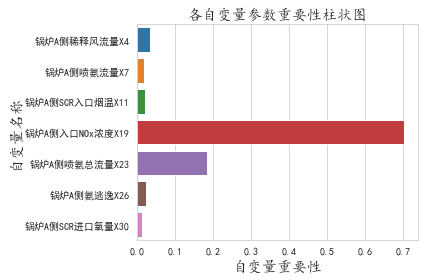

In [7]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.barplot(rfc.feature_importances_,feature_name)
plt.title('各自变量参数重要性柱状图',fontproperties=zhfont1)
plt.xlabel('自变量重要性',fontproperties=zhfont1)
plt.ylabel('自变量名称',fontproperties=zhfont1)
plt.tight_layout()
plt.savefig("D:\kaishi\热力图.png",box_inches='tight',dpi=600,pad_inches=0.0)
plt.show()